In [1]:
from uuid import uuid4

import torch
from torchvision import datasets
from torchvision import transforms

import syft as sy

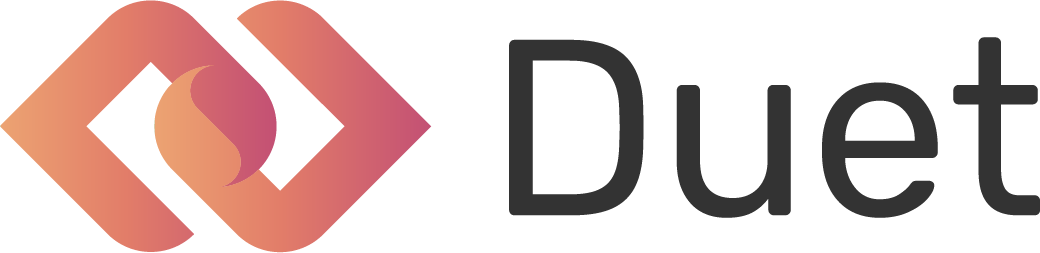

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  -  Objects: 0  Requests: 0   Messages: 0  Request Handlers: 0                                torch.Size([25000, 392])


In [2]:
duet = sy.duet(loopback=True)

---

## Load data

We use a utility function to split the MNIST dataset in two: left and right halves.
Data owner 1 owns the left halves of the images.
In practice, DO1 would already have this dataset, so splitting would not be necessary.

In [3]:
def split_data(dataset, worker_list=None, n_workers=2):

    if worker_list is None:
        worker_list = list(range(0, n_workers))
            
    #counter to create the index of different data samples
    idx = 0 
    
    #dictionary to accomodate the split data
    dic_single_datasets = {}
    for worker in worker_list: 
        """
        Each value is a list of three elements, to accomodate, in order: 
        - data examples (as tensors)
        - label
        - index 
        """
        dic_single_datasets[worker] = [] 

    """
    Loop through the dataset to split the data and labels vertically across workers. 
    Splitting method from @abbas5253: https://github.com/abbas5253/SplitNN-for-Vertically-Partitioned-Data/blob/master/distribute_data.py
    """
    label_list = []
    index_list = []
    index_list_UUID = []
    for tensor, label in dataset:
        height = tensor.shape[-1]//len(worker_list)
        i = 0
        uuid_idx = uuid4()
        for worker in worker_list[:-1]: 
            dic_single_datasets[worker].append(tensor[:, :, height * i : height * (i + 1)])
            i += 1
            
        #add the value of the last worker / split
        dic_single_datasets[worker_list[-1]].append(tensor[:, :, height * (i) : ])
        label_list.append(torch.Tensor([label]))
        index_list_UUID.append(uuid_idx)
        index_list.append(torch.Tensor([idx]))
        
        idx += 1
        
    return dic_single_datasets, label_list, index_list, index_list_UUID

In [4]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('mnist', download=True, train=False, transform=transform)

In [5]:
img, _, _, _ = split_data(trainset)
img = torch.cat(img[0][:25_000])  # get the first split of the data
img_rshp = img.view(img.shape[0], -1)
print(img_rshp.shape)

In [6]:
val_img, _, _, _ = split_data(valset)
val_img = torch.cat(val_img[0][:5_000])
val_img_rshp = val_img.view(val_img.shape[0], -1)
print(val_img_rshp.shape)

torch.Size([5000, 392])


---

## Send to the data scientist

DS can now use pointers to the data to train a model.
The DS **cannot** access the raw data.

In [7]:
img_rshp.send(duet, searchable=True, tags=["flatten"], description="flattened")
val_img_rshp.send(duet, searchable=True, tags=["flatten_val"], description="flattened validation data")

In [8]:
duet.requests.add_handler(action="accept", tags=[""])

[2021-03-08T07:11:10.081860+0000][CRITICAL][logger]][35151] You are not Authorized to access this service
[2021-03-08T07:11:10.082112+0000][CRITICAL][logger]][35151] You are not Authorized to access this service
[2021-03-08T07:11:10.082228+0000][CRITICAL][logger]][35151] You are not Authorized to access this service
Exception in callback AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55
handle: <Handle AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55>
Traceback (most recent call last):
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/nest_asyncio.py", line 199, in run
    ctx.run(self._callback, *self._args)
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py", line 62, in _callback
   

[2021-03-08T07:11:24.840149+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b629060228d54f54801be1ee256d353b>.
[2021-03-08T07:11:25.114627+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 75a1fab605624eb0881ca9014f776bee>.
[2021-03-08T07:11:25.385469+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c972ba57ff4e4e3d93a0baf27634284c>.
[2021-03-08T07:11:25.675425+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e8cd68ead54d4d559f65e09b6c1b476e>.
[2021-03-08T07:11:25.969045+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 302ab7ac97bd426a8cf1c7ca08cfe03e>.
[2021-03-08T07:11:26.279295+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bfc87d7596d8410

[2021-03-08T07:11:39.531145+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: edfcaea3b35e41c1906d0510eec78bc9>.
[2021-03-08T07:11:39.834311+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e01627a59073463d9b865dac87a8c560>.
[2021-03-08T07:11:40.128225+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 414beb45e3524fa18b19ac51e81b3f8b>.
[2021-03-08T07:11:40.432854+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1fc9d0337a164b09b414f57ac91b571d>.
[2021-03-08T07:11:40.739159+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4a36856d7d3a4213aec927df33b60628>.
[2021-03-08T07:11:41.048783+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6c814949524d411

[2021-03-08T07:11:54.326829+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9829a253513d45a8b0181bd94638d711>.
[2021-03-08T07:11:54.631882+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f1c2fdddbe5b4492aa23b751a6824c63>.
[2021-03-08T07:11:54.939112+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c8291f665c7b43019fc6905031a7016d>.
[2021-03-08T07:11:55.238200+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d29ced5e9cbf4e408d55f5861d803589>.
[2021-03-08T07:11:55.536303+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 67d3e5dad91e475f887342e2a7daeafd>.
[2021-03-08T07:11:55.835571+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c998e6e904c44f7

[2021-03-08T07:12:09.099127+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e2721001b98c43b0a28b6e4b92bc7f34>.
[2021-03-08T07:12:09.401333+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: efd0406473b84e43a766d76ec2fdc6a5>.
[2021-03-08T07:12:09.696672+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2dfa21ea40ea4271b79a5ec7ba2d287c>.
[2021-03-08T07:12:10.001178+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e9f8202516aa4d22aa6e62feeb3ecdc2>.
[2021-03-08T07:12:10.311396+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 00a0b9ebbd1e4063b3bff3170267c73a>.
[2021-03-08T07:12:10.618592+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 21f4922d8ec64e5

[2021-03-08T07:12:24.525260+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e6d7a1614f96425dbd3dafcb99ee37a2>.
[2021-03-08T07:12:24.808163+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 37424a8e85564749ba0dd4c21654d550>.
[2021-03-08T07:12:25.089933+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ab697b592d4e4164be9384959273c3b8>.
[2021-03-08T07:12:25.371857+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 73d7f1683bd9477ebb99c2f2754772e1>.
[2021-03-08T07:12:25.653232+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 959e84ce4f7d4421a773b6c3032491e7>.
[2021-03-08T07:12:25.934925+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c75fea061da24c5

[2021-03-08T07:12:41.238978+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 26b13612ec2a4749b658b44cb5114391>.
[2021-03-08T07:12:41.530261+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0c34003b870f4872846e91fdf3da5b18>.
[2021-03-08T07:12:41.833665+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a32b9d7826c48728f76518d687260cb>.
[2021-03-08T07:12:42.127574+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 238f065db4f049388f248473dc2a6838>.
[2021-03-08T07:12:42.423931+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 93d85b2e40ba46b6a3807bec99e2c4ba>.
[2021-03-08T07:12:42.727103+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 66c17648d7f24ec

[2021-03-08T07:12:55.992274+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 44b9bd3f950b4523b72b4c72bf0b9892>.
[2021-03-08T07:12:56.299897+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 10c1845e5c424f12a346585b369671db>.
[2021-03-08T07:12:56.604484+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a3cfaeea7b9642ecada0201f3ae34bee>.
[2021-03-08T07:12:56.906575+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 21b11be100a544aebe699eb574710b05>.
[2021-03-08T07:12:57.208996+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dbed4a5e455440369b989cdbd1228490>.
[2021-03-08T07:12:57.514369+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f91f7f1a59f1491

[2021-03-08T07:13:10.703744+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 154f59266e594c1282500a4447fc043a>.
[2021-03-08T07:13:10.975874+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 300867b9bbfb44869462077ad049f684>.
[2021-03-08T07:13:11.279247+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f2feace7113e4de295bb806d46597ca7>.
[2021-03-08T07:13:11.573797+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f58229722f9648818e56626c9eda1574>.
[2021-03-08T07:13:11.878212+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 52d4516acfd44031ada903008d0eee18>.
[2021-03-08T07:13:12.184482+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e639c8205849466

[2021-03-08T07:13:25.574218+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: eafc0825699246c8a70fbbbda54fdb11>.
[2021-03-08T07:13:25.879024+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 49cde28330c747fe9892ee180e223ad7>.
[2021-03-08T07:13:26.180249+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3abf358bb1d24a33acbd5592dec6df32>.
[2021-03-08T07:13:26.478417+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 548b1c31ca104ec7a0129eb222faa312>.
[2021-03-08T07:13:26.783269+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 452c6593388e40bd881d9748cf1aca5e>.
[2021-03-08T07:13:27.088198+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bf5299a1c3fa406

[2021-03-08T07:13:40.669714+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4c480a81ba4247a2bd828a5051383d21>.
[2021-03-08T07:13:40.949846+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d1d668f4bedf458d8fae94706d8ba91c>.
[2021-03-08T07:13:41.231139+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 514f7d9c314d4a54af5583d9cc3caf5e>.
[2021-03-08T07:13:41.512746+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fe8ad7610fe34889872e0a09819eb2b9>.
[2021-03-08T07:13:41.787995+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3db53dd97fa54d1cb31f4ca213103754>.
[2021-03-08T07:13:44.281254+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8cacdbb5fcf241d

[2021-03-08T07:13:57.552382+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d52ad9e77ee349f19c5015d217f12c44>.
[2021-03-08T07:13:57.846785+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2ddf7c0696184fd185d2494e26d5faca>.
[2021-03-08T07:13:58.151377+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a69037a6f5ae4b3782eadd3c548c329f>.
[2021-03-08T07:13:58.453435+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 926992fe7da04abaa90ee1ea76501ca5>.
[2021-03-08T07:13:58.757582+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0bf8b94985fd479db14f7810b96a949a>.
[2021-03-08T07:13:59.054066+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: afb0d6b8c63c46d

[2021-03-08T07:14:12.297029+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6248cc37877b4dd0af9849ae28c76bb7>.
[2021-03-08T07:14:12.595450+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7fab182c4b7d4038a7690538a00cec30>.
[2021-03-08T07:14:12.899636+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b504d3b598484c14874bf9fe0c846461>.
[2021-03-08T07:14:13.202576+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1019c886fa21473eafc86979ea3b944d>.
[2021-03-08T07:14:13.500190+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1f1232c920aa4b6fb292c881a5b937bc>.
[2021-03-08T07:14:13.808460+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 60749032a15849b

[2021-03-08T07:14:27.075976+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 44046d03ba564938b9687659773af17d>.
[2021-03-08T07:14:27.370063+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 36922a01c08c4c2e897ae9cd4b9a50f1>.
[2021-03-08T07:14:27.674505+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1df8eecdf4894ad585e197077fc3f1d4>.
[2021-03-08T07:14:27.943676+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4acc03b048a1428e857d49327c3a67e0>.
[2021-03-08T07:14:28.248562+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 17c4c8ee3162415e92d869b431bc4a23>.
[2021-03-08T07:14:28.552947+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 411f28490f6a4d0

[2021-03-08T07:14:41.764877+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e9bedec30b6c45bfa6ee0781e6e51eca>.
[2021-03-08T07:14:42.074397+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 516141b2b9ef46a1bd31667f9319cbbd>.
[2021-03-08T07:14:42.379349+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dea91997566f42c38b58401490f455d3>.
[2021-03-08T07:14:42.674785+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cd8baae8d8fd4ea8892fba4b991ae928>.
[2021-03-08T07:14:42.952868+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 020a9a3f82da492b81888ec6c02c7f67>.
[2021-03-08T07:14:45.470110+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 09ca35548d104e8

[2021-03-08T07:15:00.063159+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f6313e960dc0474fae848703c111c09e>.
[2021-03-08T07:15:00.365498+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4e55f2c2d15e4019ac5ca1cff554b69f>.
[2021-03-08T07:15:00.661760+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4ab518655b2046efa48dc3ae5c0a6fcb>.
[2021-03-08T07:15:00.957998+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e6f92c9d09524952aa98e05f277410f3>.
[2021-03-08T07:15:01.231980+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8e847b8ee7fa4be2a31ea3d9e0a8c2ca>.
[2021-03-08T07:15:01.531186+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: da0aa33445ab449

[2021-03-08T07:15:14.269709+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d87e822b15f3428ea1b281f2d9c3ef6e>.
[2021-03-08T07:15:14.557747+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 808e4a8074f94e37bc816692a5a92c5c>.
[2021-03-08T07:15:14.861515+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2e0156936cf84902919a04564fbc5034>.
[2021-03-08T07:15:15.154872+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d13690818b8f4a41819f1cae47618a2b>.
[2021-03-08T07:15:15.446869+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2943e16e9f464cf7b4d7223e46bb665a>.
[2021-03-08T07:15:15.737140+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 71c8df92a9ea428

[2021-03-08T07:15:28.319716+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6bfbc980a96a4e1baa4ae578892cb99f>.
[2021-03-08T07:15:28.598825+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c1faa786451e4f6dbaccf5c43f0c3621>.
[2021-03-08T07:15:28.882527+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0c81795cb6f640cca422edadb1ff75e9>.
[2021-03-08T07:15:29.161702+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 67a142031bb843938828669242bba353>.
[2021-03-08T07:15:29.440663+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c6e542119c2d4935989c1e74286d7464>.
[2021-03-08T07:15:29.720888+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 94a0a760b9f745e

[2021-03-08T07:15:42.156029+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d144da24c80a44989f19b17918be8acc>.
[2021-03-08T07:15:42.442150+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b31bb08a6b91445fbaf20fd53d0be0a8>.
[2021-03-08T07:15:42.730064+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fd3e3a40227542daa621014ca22476ce>.
[2021-03-08T07:15:43.035692+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4210ac33fe7340549b416ea3fd426a28>.
[2021-03-08T07:15:43.323619+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8cc00bd5098f41dfb6d033e952495f5e>.
[2021-03-08T07:15:43.612073+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: af4ad70e6b5d4ea

[2021-03-08T07:15:58.076945+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dadaea668ac746fa9327d539c2b7cba5>.
[2021-03-08T07:15:58.327619+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b79ba5408b54086a735d2cbbcf4cbb9>.
[2021-03-08T07:15:58.582523+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1a48c3644f5c4e1b8a83ffab799743e9>.
[2021-03-08T07:15:58.836247+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2316c37c342445239ac6f753d5b35d18>.
[2021-03-08T07:15:59.093225+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7483d78ce58b4d438989586a54afb791>.
[2021-03-08T07:15:59.349882+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2a724755ecc6465

[2021-03-08T07:16:13.111658+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c5f778b1e89f4b75a9e55b5d95740337>.
[2021-03-08T07:16:13.392467+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c8f5ecb11ef04047a495912183112014>.
[2021-03-08T07:16:13.672646+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1865520040aa4cd3adb7bcd868686a38>.
[2021-03-08T07:16:13.955294+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 563553f7333e4e01981d460d58b3dd16>.
[2021-03-08T07:16:14.248451+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6ba00d3354b44975a01ee30e79a1b040>.
[2021-03-08T07:16:14.533805+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bd6c3c17970f4ef

[2021-03-08T07:16:26.876675+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f8222a287c164ab5b2e1ee7791bdfffa>.
[2021-03-08T07:16:27.154645+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c27bc5a51a1a421297eee9955ca3dc6f>.
[2021-03-08T07:16:27.434294+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 827eda981f7b4ded849729cf3cb74a12>.
[2021-03-08T07:16:27.718448+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fa973d444c2942d8932ca63ea4c98ac5>.
[2021-03-08T07:16:28.003426+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4512be62168b479ba94a7a8dfb879770>.
[2021-03-08T07:16:28.280146+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7b08ab133dc349c

[2021-03-08T07:16:40.734939+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ac6f220b56dc466a81da84190ecf6b4e>.
[2021-03-08T07:16:41.018528+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5e68943bc38e49fa952d5b394d04b79c>.
[2021-03-08T07:16:41.298886+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4955a380adc24d75a0e553d3d292817f>.
[2021-03-08T07:16:41.574895+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3829b52815cc4f81b29275afc356591e>.
[2021-03-08T07:16:41.855303+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 784d88a5c33d47c4972a115978fa707f>.
[2021-03-08T07:16:42.133450+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 655c8a3d90de4c1

[2021-03-08T07:16:54.460872+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3482c5bda2d9468a980ee628eaa37acf>.
[2021-03-08T07:16:54.744177+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 737877a60dfa41f18a835c3412cdc2a4>.
[2021-03-08T07:16:55.024802+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b5c6cb4999be4805b54ead9658dda18f>.
[2021-03-08T07:16:55.304940+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0da1e100b8904337b7212a6568d162ba>.
[2021-03-08T07:16:55.577222+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b3a369d6ea64fc8af30a21553aeabc7>.
[2021-03-08T07:16:55.853051+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e6fc8763154d44b

[2021-03-08T07:17:10.029239+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fa75e9e3813e4fc6ad164b9396cb10e0>.
[2021-03-08T07:17:10.279919+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f616214661694bdba402f7648801cec2>.
[2021-03-08T07:17:10.534929+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 84d27b7198644f8c98b467670d781007>.
[2021-03-08T07:17:10.788975+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bdf3dfcbf86f4fdf9d5a08812379ba2a>.
[2021-03-08T07:17:11.051077+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8954c8fa5fcb481183ca9711860d5ef2>.
[2021-03-08T07:17:11.306134+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 70b7e474164a4bc

[2021-03-08T07:17:25.354311+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 107b3f73b33a4fd4995fd09d0c22fc79>.
[2021-03-08T07:17:25.636497+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a33c209c22514ef58ef7d5fe7f4b6996>.
[2021-03-08T07:17:25.920052+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e4670c5712f5492392eb6d62c23d8d63>.
[2021-03-08T07:17:26.207428+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fdc659f88cd34f3196083f51da1d5045>.
[2021-03-08T07:17:26.490914+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f2fef5e5093a453c8fe9308cab052fd2>.
[2021-03-08T07:17:26.776210+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ce8cfab738434cc

[2021-03-08T07:17:39.356011+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d6c0bf5e70fb46d2a0636508cc3507df>.
[2021-03-08T07:17:39.647160+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9d307d1327224ab08a34742b5c901872>.
[2021-03-08T07:17:39.936528+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 45c4c46beac943cfb799b8bab6c64836>.
[2021-03-08T07:17:40.212279+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f16507c6b1a04505a5a5e13d7990bcb2>.
[2021-03-08T07:17:40.490794+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 353045d6c2814a09a91794c51d79a8a1>.
[2021-03-08T07:17:40.765642+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a355e5d0036d4f3

[2021-03-08T07:17:53.353915+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 731492fa147147c6a18dba74004049c3>.
[2021-03-08T07:17:53.647083+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4ea2cb66c77348e99e821e873ee1ad04>.
[2021-03-08T07:17:53.928332+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9d111d3bd3964ae986170c15205f68c8>.
[2021-03-08T07:17:54.214487+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7ed3a63241ce4803b4780041b61ae499>.
[2021-03-08T07:17:54.492163+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fb0276d3f49346159bcaf3e07749b52e>.
[2021-03-08T07:17:54.779404+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 742f4db438c9462

[2021-03-08T07:18:07.143917+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dcf4510d6b3c4d78a65863ac74b39fec>.
[2021-03-08T07:18:07.424337+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2b0a141b19d34c378ac449c763b3ab9c>.
[2021-03-08T07:18:07.708847+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e4ec994a5e7447d4818252068ba40e3f>.
[2021-03-08T07:18:07.986528+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0d21faf44ac447dd9e1fb7ffc4ce46ad>.
[2021-03-08T07:18:08.263185+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1cf6de876dfe42fda0360d13a1bcd5e7>.
[2021-03-08T07:18:08.542000+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b08b2a5fae97414

[2021-03-08T07:18:21.531020+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fdf8debe1fd34b2da616d5be4957f1c0>.
[2021-03-08T07:18:21.786726+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 93e4614af0274fbf8ae3cf15981f9be6>.
[2021-03-08T07:18:22.041453+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2554e79d757148c3904d90bbb139acf2>.
[2021-03-08T07:18:22.292744+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a14a7d145604c6d8afc004196254570>.
[2021-03-08T07:18:22.545943+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 92b4d3040f5140bf97fd33c3cd5108bb>.
[2021-03-08T07:18:22.795945+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b3752eeaa8284c7

[2021-03-08T07:18:36.969487+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 52771e665ebe47d7b218298652b82f9d>.
[2021-03-08T07:18:37.249845+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6edbd4f832f645bdbb4699ca79fcf7e1>.
[2021-03-08T07:18:37.528996+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 37c42f7cc9e34a1d9d3143d3fd862656>.
[2021-03-08T07:18:37.808476+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d6e28af5667942bab1821f787465771c>.
[2021-03-08T07:18:38.087019+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b313b81158e943a7bca6ecf09047b5aa>.
[2021-03-08T07:18:38.359975+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ec9ca0f858f648a

[2021-03-08T07:18:50.793809+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2ad8d13cd2194aa6ab6e15bfd78006d5>.
[2021-03-08T07:18:51.075017+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1a65b100e1214c578d82d1ffdfa50529>.
[2021-03-08T07:18:51.353317+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e482f1179b3a4f85b96dc348c58f3790>.
[2021-03-08T07:18:51.631264+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 071738892dab4c7286fe49c72b437a33>.
[2021-03-08T07:18:51.910804+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8d4cba14562a46cc9d763e0312a95f75>.
[2021-03-08T07:18:52.189245+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d9a0aca15206458

[2021-03-08T07:19:04.519599+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f0759b3417e441fe80d4f1d0c583c48b>.
[2021-03-08T07:19:04.796339+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a5327ad9bd4b4616b43ab786281cfd7a>.
[2021-03-08T07:19:05.078754+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cf465404f46b41048bb3d3ccc43c5cf7>.
[2021-03-08T07:19:05.366968+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a716a1f41d7a44f5a61d92e6b4e0e006>.
[2021-03-08T07:19:05.644806+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 69fb0585c87342f181fd0ce1c09c3a0f>.
[2021-03-08T07:19:05.932578+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e8a0add2d9734f3

[2021-03-08T07:19:18.338730+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b1b000bf6ae84ca2aba52b8a668e7811>.
[2021-03-08T07:19:18.619912+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5e33c842ad73483aa73df713dd686f69>.
[2021-03-08T07:19:18.902636+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 203452fcc77f463183346844f595ac19>.
[2021-03-08T07:19:19.181739+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cfda1c54b7724cad8ab5a43e4d7dea01>.
[2021-03-08T07:19:19.463762+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 579bf796b5694775a927374fc9d00d9b>.
[2021-03-08T07:19:19.741167+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 22a5bbf2ade54cf

[2021-03-08T07:19:33.450215+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 678b2d149de74394b374808626cab850>.
[2021-03-08T07:19:33.706036+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b3bbc15522ad4cc092826d3b83e27b56>.
[2021-03-08T07:19:33.956568+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 39cabf12a90849e2a8d20855be9e68e1>.
[2021-03-08T07:19:34.213411+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 246cf04d23894fb3930d72dcf7f95734>.
[2021-03-08T07:19:34.469331+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 633db9547f904ff0a8e061fa4142e94a>.
[2021-03-08T07:19:34.724791+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 330dcb05f1f64ce

[2021-03-08T07:19:48.162470+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 09dc6e4e677a4ac984e04c2fd2ec57e0>.
[2021-03-08T07:19:48.444415+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5231323c40694a8f9b4932d22223cf48>.
[2021-03-08T07:19:48.722740+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 25e1d455e88c41528732aac14d77c14d>.
[2021-03-08T07:19:49.004182+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d92373761e3d4a4fbaf6cefe8cb6745b>.
[2021-03-08T07:19:49.286811+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3b81eece4d524d83bc3d4f4e43f38908>.
[2021-03-08T07:19:49.565856+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56e6ec2232be408

[2021-03-08T07:20:01.946412+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a4afc5eee9b46f4a8bbf213ba0b6fb2>.
[2021-03-08T07:20:02.225675+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 29974dfa6e0a48b9b7e7a81c9806acdb>.
[2021-03-08T07:20:02.507388+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d23abc9d3e5245d8a13572819751dc6c>.
[2021-03-08T07:20:02.787878+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a6a336893ea9467a91f09463505c8a37>.
[2021-03-08T07:20:03.071440+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 36836123a8c04c3f99809c3aeaa4385a>.
[2021-03-08T07:20:03.353863+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 67da47070958455

[2021-03-08T07:20:15.692223+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 29de7b0475664f328c59c2fc9b850bd5>.
[2021-03-08T07:20:15.969714+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f83f025495f1406da00e316badfdce42>.
[2021-03-08T07:20:16.256327+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ce5c7a04f65744149b0dec23532f2dad>.
[2021-03-08T07:20:16.538184+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7a0045794a9c4768ba48e0fb717f68f9>.
[2021-03-08T07:20:16.813912+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b1178389842f479b94e0691e7460e40b>.
[2021-03-08T07:20:17.093873+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e3581468a9e84ea

[2021-03-08T07:20:29.428844+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bc232c12980a4f66b22c65bfc0f3fb1c>.
[2021-03-08T07:20:29.709343+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5f614db339fb4c98bd0457d20d488f4c>.
[2021-03-08T07:20:29.988158+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 61444ec5c348429e902208293ff8b69c>.
[2021-03-08T07:20:30.269090+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 83b322bcaee74de8b587e840a7b2719a>.
[2021-03-08T07:20:30.543641+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4142a37ea9574b5ea7e3413f908995f0>.
[2021-03-08T07:20:30.822433+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6c386be2ca71474

[2021-03-08T07:20:45.488483+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7ddd870ba5d941c7b80d0d66f16a9dcc>.
[2021-03-08T07:20:45.765956+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 644b655431fe467b9052cb462584ae52>.
[2021-03-08T07:20:46.044810+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 333ce72d3d8d4015a55580bc96cf91cd>.
[2021-03-08T07:20:46.321293+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9c488f8e9d664e1685c41f2138ac2585>.
[2021-03-08T07:20:46.600047+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f3eb97e638004e91a9d29a905617202e>.
[2021-03-08T07:20:46.879682+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ff2d5ba583514f4

[2021-03-08T07:20:59.356411+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e72c5a9f29b148d7989c8880f080931f>.
[2021-03-08T07:20:59.637652+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 031ea92147254fc3b25689c04e5945e3>.
[2021-03-08T07:20:59.927640+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8272b38c7e0b411da4570981eec53a37>.
[2021-03-08T07:21:00.215634+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0d0d51bc13e14f11a37c59248568bd6c>.
[2021-03-08T07:21:00.494923+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e2c46d722c3b4b56abd1710adba87119>.
[2021-03-08T07:21:00.789904+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e208102912154a4

[2021-03-08T07:21:13.347870+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 011512d75ffa41c88ee5b4556947011f>.
[2021-03-08T07:21:13.632351+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bee847714ab24e24a4d769483cdc9a15>.
[2021-03-08T07:21:13.911677+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0fa120d920fc4b02b61fb08c7d5c3211>.
[2021-03-08T07:21:14.195991+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f4b5f55d8f994fc9870edbf2f5fafcd9>.
[2021-03-08T07:21:14.472198+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 24fdca1d2b9741aa9e77b486ded25152>.
[2021-03-08T07:21:14.752831+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cfee60f6ffc241e

[2021-03-08T07:21:27.089131+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 41d6389b060c406e96a7af54e34f9ea6>.
[2021-03-08T07:21:27.371763+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7459cad94f8845ea8c3461a522769a2d>.
[2021-03-08T07:21:27.649056+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 410f824dfcc349948d9df70a697f859a>.
[2021-03-08T07:21:27.926663+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 68cb86b1fe254ff2a3c8c36a9ae9cb2e>.
[2021-03-08T07:21:28.206223+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: adc9896d8c7f49e4b3cd3b61fd764821>.
[2021-03-08T07:21:28.489680+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 919160bd6b4d446

[2021-03-08T07:21:43.024037+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 51014836639841429bfb1f4b5fa67a93>.
[2021-03-08T07:21:43.278477+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1f3fe0aa417046ddb1873c43af1377b8>.
[2021-03-08T07:21:43.528645+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6e9c0724f83d4e119810bd20154d83f3>.
[2021-03-08T07:21:43.783842+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d00556d718d9493fa1121db451fd8e07>.
[2021-03-08T07:21:44.036532+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 208edd449c55476e85ba1d072fbbb931>.
[2021-03-08T07:21:44.293549+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5a9809340adc431

[2021-03-08T07:21:57.928117+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3d403a37987746579bd2c4be4657cb7d>.
[2021-03-08T07:21:58.212043+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 575e11d8fd3a4f16ad79aae02d762988>.
[2021-03-08T07:21:58.492181+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 43eefb9ea9f348a19edf0d46fff50c3b>.
[2021-03-08T07:21:58.769501+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7270af4f93874acc8e54dd91f60d4cf6>.
[2021-03-08T07:21:59.048431+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3d4af781206b442d9c6ff1972820a590>.
[2021-03-08T07:21:59.341140+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bc7dbda6d6654ad

[2021-03-08T07:22:11.681516+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a7c1261adb2e4e9eaf15979b83e5e872>.
[2021-03-08T07:22:11.963926+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 683d442ef94c4c2996c377af684fd9dd>.
[2021-03-08T07:22:12.239933+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2d62c295372b47e7b5450f2499ed1702>.
[2021-03-08T07:22:12.522894+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6d785eeafb35401d8505062dd5b78817>.
[2021-03-08T07:22:12.800390+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0104a9a5721f4661b8abde6d4ad683ae>.
[2021-03-08T07:22:13.074984+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c6cad34d804b4ea

[2021-03-08T07:22:25.350102+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3e014bbf2ccb4d8cb39cd99060dad530>.
[2021-03-08T07:22:25.623285+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7e3898a005e84a89a56a8524c0c8e863>.
[2021-03-08T07:22:25.899455+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8a96e5f0db0348b7ba923b0894f142d3>.
[2021-03-08T07:22:26.176667+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a1032fb43f044da8e08dd679f49710a>.
[2021-03-08T07:22:26.462570+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3a116ded7b374428a85aa61c5021c244>.
[2021-03-08T07:22:26.736588+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 95c08640c07a47c

[2021-03-08T07:22:39.057796+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4082727eb48d4ea486c5ce94b4780a39>.
[2021-03-08T07:22:39.335579+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cb3be21eabeb40fda9682d8fb5e95784>.
[2021-03-08T07:22:39.613283+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: aa0d568ea1c349f4932ab2985d5b7850>.
[2021-03-08T07:22:39.888365+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 474ae27445f6493e940dd6fd5e9b283c>.
[2021-03-08T07:22:40.170338+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ed2d032d1a3c41388890b79c27a1fd25>.
[2021-03-08T07:22:40.449412+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7e62fdb71bb1467

[2021-03-08T07:22:53.741196+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bfc2145b5c564d22a6479509b0bb548b>.
[2021-03-08T07:22:53.996470+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3ec7883707f04593b0c6c199813ab6c3>.
[2021-03-08T07:22:54.253675+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3b24a71162e64ab0af5f796855e510c4>.
[2021-03-08T07:22:54.505882+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 596d18a6b6c14adbbb4cab1e5d772d3e>.
[2021-03-08T07:22:54.761066+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8fcde7ae86834813ba6635e872cf7feb>.
[2021-03-08T07:22:55.011891+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d7918d8b4f6e480

[2021-03-08T07:23:08.989195+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 967b6b2e88da449ba340e82ac7d036a0>.
[2021-03-08T07:23:09.271881+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0f08b72e3a6e4b47b151ad05bf0754a4>.
[2021-03-08T07:23:09.549135+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6539565e549047e3b343957f6bd8d289>.
[2021-03-08T07:23:09.821828+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bc6553788f224577a97e5e6548f35d41>.
[2021-03-08T07:23:10.106352+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9c0bdeb9d90b45dc806b83b232499021>.
[2021-03-08T07:23:10.386954+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 39343d01d16949c

[2021-03-08T07:23:22.724084+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8adbe5265e92460f8cdf7e9a4882fe8a>.
[2021-03-08T07:23:23.003950+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 45f22bd2a427418ca2b6b5753b9e21f6>.
[2021-03-08T07:23:23.280516+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 53b5975dd4214c71b2d404f3fdab5d62>.
[2021-03-08T07:23:23.561571+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2ca1df2dbfad4da9850df01895c094cd>.
[2021-03-08T07:23:23.839882+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d613985ce6d54076a6de4f768442dc04>.
[2021-03-08T07:23:24.122838+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56d02aacad244a9

[2021-03-08T07:23:36.432650+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d549e1e3776448938addacf3de6e4bd1>.
[2021-03-08T07:23:36.710443+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e2a9a67cde484e7ab8e9fda55756f81e>.
[2021-03-08T07:23:36.989208+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e4f4bd44d1da4da6b2e61703f2bc834b>.
[2021-03-08T07:23:37.266345+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e832309956ee4030b5039a3d9b15a815>.
[2021-03-08T07:23:37.549928+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 46ce62220f344a2eaea32f0615fcd0ab>.
[2021-03-08T07:23:37.828117+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 867a7aed18b9403

[2021-03-08T07:23:50.127655+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6540ceb6ed5b44c4ba88745fe3c85ed5>.
[2021-03-08T07:23:50.403746+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 11a538e31d4e4a1088bc4a44abc6eb07>.
[2021-03-08T07:23:50.684917+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 277741fe249e4477a76698fd9ea5968e>.
[2021-03-08T07:23:50.964846+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4e037d2c200b4b42a3e7a06aa85a5d0c>.
[2021-03-08T07:23:51.245602+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dcef00ccf7f14296b1df89059703e130>.
[2021-03-08T07:23:51.520545+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5514e5d6248f4d2

[2021-03-08T07:24:05.606640+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1f89ae8fb2ae4b31b8519a88cd45f6ed>.
[2021-03-08T07:24:05.859147+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0b56d8857a2b422cb60e7b72436c383e>.
[2021-03-08T07:24:06.121338+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 662cc9f8f4d14cbfbbeb8e5b4848cfa3>.
[2021-03-08T07:24:06.370731+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: dc0efaacb68b4a82b67ade66b14cd639>.
[2021-03-08T07:24:06.621347+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9e92d874b2ff4ce6a16b965c0efa930d>.
[2021-03-08T07:24:06.872849+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d64a1186bcc7405

[2021-03-08T07:24:20.953415+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3c458a4a306e45099b1f427a50051577>.
[2021-03-08T07:24:21.232964+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c57600e6be7c457ab4f3f70cd42d6423>.
[2021-03-08T07:24:21.510420+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 11e3f603909b4f3cab04124687f12d1e>.
[2021-03-08T07:24:21.789899+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: beb0ba4fd2d643f59e46f8c3a1635a85>.
[2021-03-08T07:24:22.068319+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 75828e2b9f4a4b7384abf84aba8c922c>.
[2021-03-08T07:24:22.347330+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6d9e4e4864054b5

[2021-03-08T07:24:34.628426+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ecb5065940f04b7595f019737274ceb4>.
[2021-03-08T07:24:34.907633+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7bec380e47474ba89ea97ee217036431>.
[2021-03-08T07:24:35.189013+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c3892909a1a8467c8aedf154f465646b>.
[2021-03-08T07:24:35.468952+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9a4173692cd34c58a67348b26e751399>.
[2021-03-08T07:24:35.748418+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2166b67631d84852b5398760db23814c>.
[2021-03-08T07:24:36.027941+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 73eb1320455648e

[2021-03-08T07:24:48.305937+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3d75aea998194a48b0f7ba981875739e>.
[2021-03-08T07:24:48.587836+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1ccf60a7128d4998a42fbaf69ddeba6c>.
[2021-03-08T07:24:48.868049+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 22620ac6d2c244ac8543cb390cef3b45>.
[2021-03-08T07:24:49.154151+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d01c2977e78a4e56abea5fb6d6aed5f5>.
[2021-03-08T07:24:49.434525+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 20b0c9e86c7244ce888076fd2eeee732>.
[2021-03-08T07:24:49.712908+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b961cea0cfd940b

[2021-03-08T07:25:02.035842+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 34581b26c63b43a0aedbfa36a31f0196>.
[2021-03-08T07:25:02.320271+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 13556379b6cb4540b1bf3ab148b934c7>.
[2021-03-08T07:25:02.601916+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 17bbbd587e19497da523dd3fa931cd2b>.
[2021-03-08T07:25:02.886503+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 07b1ab53d75d45e3bd90c6514312e14b>.
[2021-03-08T07:25:03.161070+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d512e5d64de848669cec0504a7e20b55>.
[2021-03-08T07:25:03.439658+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8d79c67375034ab

[2021-03-08T07:25:17.342324+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3834ca42144148249079613720f0296f>.
[2021-03-08T07:25:17.599074+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cbbef47aa25244078cad49a4db53be59>.
[2021-03-08T07:25:17.863006+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fcfdf726f8784fefa178c250aa40c5a1>.
[2021-03-08T07:25:18.115847+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: eb4044dbdc6e446b94a38cf272651b91>.
[2021-03-08T07:25:18.367431+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 39b60ba0c10e438c84ba382ef97b5e89>.
[2021-03-08T07:25:18.626126+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a31d39f012ba45d

[2021-03-08T07:25:33.001426+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: de41db079dfa4f41bb956ba93711c2f5>.
[2021-03-08T07:25:33.283225+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4434e64a4fc6427eafa52ec7a79fb67b>.
[2021-03-08T07:25:33.556190+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3cbbebb2c3c34c39851e330f2f355f78>.
[2021-03-08T07:25:33.837023+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 781255ff38e94362a022c16c7eb5c491>.
[2021-03-08T07:25:34.115346+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8db0b18d094b456490a1a56e5ad4ddb6>.
[2021-03-08T07:25:34.400140+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 238dae6ceed143a

[2021-03-08T07:25:46.685084+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7c9dfe56921a4b55aad985d900d56312>.
[2021-03-08T07:25:46.961398+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2c7babe5819541528b9a11e9f654f2e1>.
[2021-03-08T07:25:47.240823+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1cc133bc96c84b17831ad72c0eac4c43>.
[2021-03-08T07:25:47.519700+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ccbdfe6679884bbd9e987264440dd39e>.
[2021-03-08T07:25:47.802915+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 95039801ecd243e1a501ed6a0a2ce6c9>.
[2021-03-08T07:25:48.078154+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: df1cfcd5eec1455

[2021-03-08T07:26:00.384557+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c3908a831ab44157a9dd19cca5ea1e4f>.
[2021-03-08T07:26:00.665868+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a26695becf7041c3b7f380a476ecae92>.
[2021-03-08T07:26:00.948648+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a2ebfc0254394f4c8470d31be21f7b1b>.
[2021-03-08T07:26:01.230672+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56b1d6ac34714abea0785038dc9b9e04>.
[2021-03-08T07:26:01.506708+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7b916e86a86843229305444585e2021d>.
[2021-03-08T07:26:01.788017+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ea0062333845446

[2021-03-08T07:26:14.156374+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d90ac0caa3fb4badacfe116606d4e184>.
[2021-03-08T07:26:14.440047+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 384a80d070e44e22b0a902095afa6ef9>.
[2021-03-08T07:26:14.722933+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bc9040b8c9664b56a5c8f603fb5d3de0>.
[2021-03-08T07:26:15.000866+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 348b14cf250b472e8d66d8f803249333>.
[2021-03-08T07:26:15.285283+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56ef328dcc3a4cbb9de68cc32acffb3c>.
[2021-03-08T07:26:15.577875+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2c346ea8116b439

[2021-03-08T07:26:29.553854+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 62bc5da1e79d4b3990083ca4d6ccbabc>.
[2021-03-08T07:26:29.816095+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0604a8f726f5415f9fe55cf8c360cf49>.
[2021-03-08T07:26:30.077840+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b7e0e67ab93a4bfb8ff38ca21bfc68bc>.
[2021-03-08T07:26:30.335150+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8404758afe264a97b2e64ed2734b1538>.
[2021-03-08T07:26:32.837253+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f8b1a55552f04c318e4ed3747bbd1ac3>.
[2021-03-08T07:26:33.125117+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cb356ac42521435

[2021-03-08T07:26:45.805948+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5b39a84d937741e694056d0e3d049f89>.
[2021-03-08T07:26:46.090343+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 09d2f18b6400481cb47ac2dd3b7d3f81>.
[2021-03-08T07:26:46.379651+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f777413ba4dc4e73a14c027fe213eca2>.
[2021-03-08T07:26:46.669733+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1c1ee4bdc4854a95acf6764c4b16ad42>.
[2021-03-08T07:26:46.953215+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9008e8d7963b4f34a57742985f18145a>.
[2021-03-08T07:26:47.242641+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f1732635eb0147a

[2021-03-08T07:26:59.975851+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 07b03c49c3984d9ebda1d4e2c0d1af8c>.
[2021-03-08T07:27:00.271901+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b4c437d1fcdf4a04952837b0dcc98abb>.
[2021-03-08T07:27:00.562281+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3364d05517ff4cd39839c49d1a56a822>.
[2021-03-08T07:27:00.848774+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 46254c7ac5304d59ae076ce00c510e0b>.
[2021-03-08T07:27:01.133869+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3bb97fa14cf546f8a4416062394ba604>.
[2021-03-08T07:27:01.424310+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d8fd8695d17346f

[2021-03-08T07:27:14.277716+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3f37ce64490645dca531e5af0bc49087>.
[2021-03-08T07:27:14.569033+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 780159a8102d4ca2911a27fb45371beb>.
[2021-03-08T07:27:14.857371+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 51b9a0c118154b1da0d74f2d7e3a6c4e>.
[2021-03-08T07:27:15.139869+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d37538e121ef42e4975e9a6928fcfcbd>.
[2021-03-08T07:27:15.425903+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 7507a2726cfe4d4895dbf2e8ce5fdb1f>.
[2021-03-08T07:27:15.718172+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ad4202cb3fb74a0

[2021-03-08T07:27:28.425809+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0b9e49506fd9441c93e5e1830c79ee74>.
[2021-03-08T07:27:28.719539+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e11d14c4cf3d4ca991b2e20004dfb229>.
[2021-03-08T07:27:29.008223+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 153500a360654786a038b4d0f81de3b9>.
[2021-03-08T07:27:29.288488+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 88078a3a8b564ba2a4f3426f46c7ee23>.
[2021-03-08T07:27:30.802664+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8b41666ea0e34412ba0041d2461bfccf>.
[2021-03-08T07:27:31.061981+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 91c8299d150d4fc

[2021-03-08T07:27:45.004903+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1d789c2b97664db1ba0a964492fdfd3c>.
[2021-03-08T07:27:45.288410+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 481e7866e1fa4b808c57b3d57f8e6da4>.
[2021-03-08T07:27:45.576758+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 76636d9bd16b40a4ba142f59f9fe5949>.
[2021-03-08T07:27:45.861650+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 81c0b7f2eaa047bdaecfe97fda9c90ae>.
[2021-03-08T07:27:46.146034+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 415bf8aeae354cae889c0a1290a2ba93>.
[2021-03-08T07:27:46.438602+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 71dd431302e9435

[2021-03-08T07:27:59.116067+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b2ab2d677de5479382282a888a99255c>.
[2021-03-08T07:27:59.413092+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 448226bca9f745eab4b0a562b428a7d9>.
[2021-03-08T07:27:59.700202+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 42fc22b949e8450cba8e6b8a055b1557>.
[2021-03-08T07:27:59.991262+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 990c0ae86af442838571d3f541a214f0>.
[2021-03-08T07:28:00.277381+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d1981ea733fc4121b522a151055aa7a2>.
[2021-03-08T07:28:00.566360+0000][CRITICAL][logger]][35151] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c62f4578a49f471